In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [3]:
#115 years of monthly, seasonal and annual rainfall data of India
poll = pd.read_csv('Pollution.csv', sep=",")
carbon = pd.read_csv('Carbon.csv', sep=",")
carbon['NAME'] = carbon['NAME'].str.title()
carbon.head()

,Year,NAME,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,2014,Afghanistan,2675,1194,1393,74,14,0,0.08,9
1,2014,Albania,1559,191,1053,16,299,0,0.54,23
2,2014,Algeria,39651,149,14422,20151,2856,2073,1.02,581
3,2014,Andorra,126,0,126,0,0,0,1.74,0
4,2014,Angola,9480,0,5310,158,340,3672,0.39,509


In [4]:
poll.head()

,City,Longitude,Latitude,Region,Country,Address,AirQuality,WaterPollution,Unnamed: 8,New Water,WA,Rating
0,Invercargill,-46.417871,168.361466,Southland Region,New Zealand,Invercargill Southland Region New Zealand,72.222222,30.000000,NaN,70.000000,142.222222,71.111111
1,Coyhaique,-45.571225,-72.068265,Aysen Region,Chile,Coyhaique Aysen Region Chile,0.000000,25.000000,NaN,75.000000,75.000000,37.500000
2,Hobart,-42.882605,147.325720,Tasmania,Australia,Hobart Tasmania Australia,92.857143,21.052632,NaN,78.947368,171.804511,85.902256
3,Puerto Montt,-41.468917,-72.941136,Los Lagos Region,Chile,Puerto Montt Los Lagos Region Chile,25.000000,50.000000,NaN,50.000000,75.000000,37.500000
4,Wellington,-41.292381,174.778746,Wellington Region,New Zealand,Wellington Wellington Region New Zealand,95.689655,27.403846,NaN,72.596154,168.285809,84.142905


In [5]:
carbon.head()

,Year,NAME,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,2014,Afghanistan,2675,1194,1393,74,14,0,0.08,9
1,2014,Albania,1559,191,1053,16,299,0,0.54,23
2,2014,Algeria,39651,149,14422,20151,2856,2073,1.02,581
3,2014,Andorra,126,0,126,0,0,0,1.74,0
4,2014,Angola,9480,0,5310,158,340,3672,0.39,509


In [6]:
print(poll.shape, poll.columns)

(1978, 12) Index(['City', 'Longitude', 'Latitude', 'Region', 'Country', 'Address',
       'AirQuality', 'WaterPollution', 'Unnamed: 8', 'New Water', 'WA',
       'Rating'],
      dtype='object')


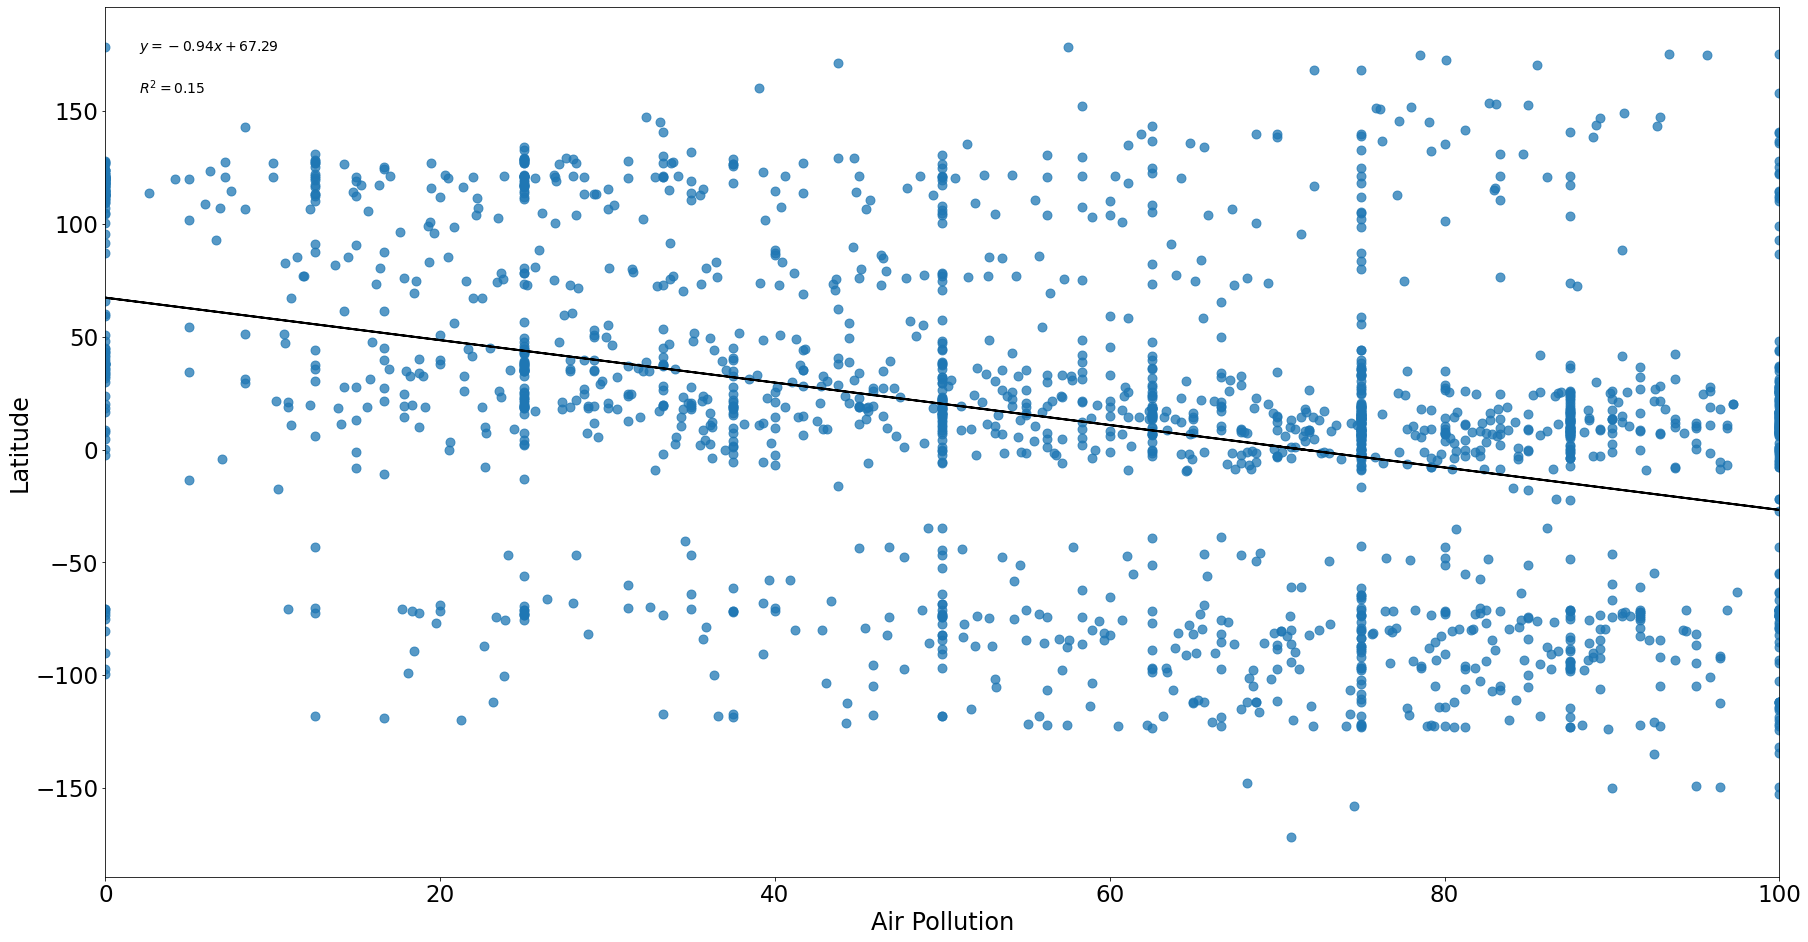

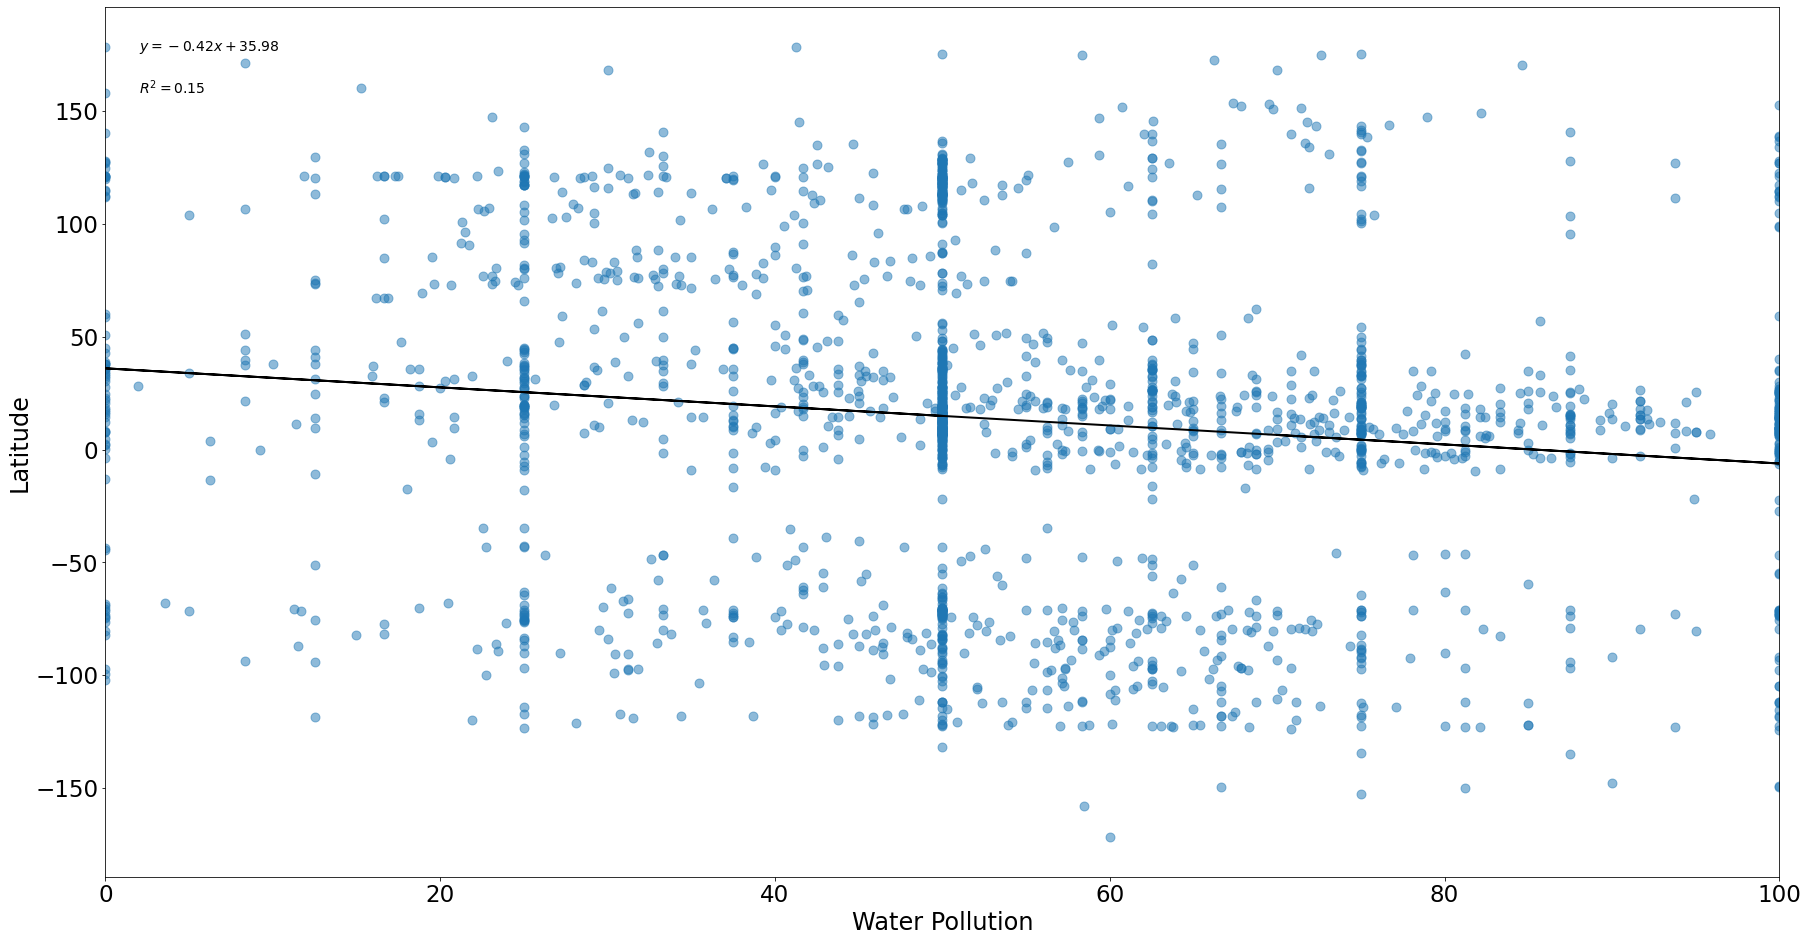

In [7]:
airquality = poll["AirQuality"]
latitude = poll["Latitude"]
longitude = poll["Longitude"]
waterquality = poll["WaterPollution"]

#create a first plot with air quality
plt.figure(figsize=(30,16))

#plt.plot(latitude, airquality)
plt.scatter(airquality, latitude, s=80, alpha=0.75)

plt.xlim([0, 100])

plt.xlabel("Air Pollution", fontsize=24)
plt.ylabel("Latitude", fontsize=24)

# Use numpy to do a simple linear fit to time series data 
model = np.polyfit(airquality, latitude, 1)
predicted = np.polyval(model, airquality)

plt.plot(airquality, predicted, linewidth=2, color='black')

slope = model[0]
intercept = model[1]
plt.annotate('$y=%3.5sx+%3.5s$'%(slope, intercept), xy=(0.02, 0.95), xycoords='axes fraction', fontsize=14)

r2 = np.corrcoef(airquality, latitude)[0, 1]**2
plt.annotate('$R^2=%3.4s$'%(r2), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=14)

plt.show()

#create a second plot with water quality
plt.figure(figsize=(30,16))

plt.scatter(100-waterquality, latitude, s=80, alpha=0.50)

plt.xlim([0, 100])

plt.xlabel("Water Pollution", fontsize=24)
plt.ylabel("Latitude", fontsize=24)

# Use numpy to do a simple linear fit to time series data 
model = np.polyfit(100-waterquality, latitude, 1)
predicted = np.polyval(model, 100-waterquality)

plt.plot(100-waterquality, predicted, linewidth=2, color='black')

slope = model[0]
intercept = model[1]
plt.annotate('$y=%3.5sx+%3.5s$'%(slope, intercept), xy=(0.02, 0.95), xycoords='axes fraction', fontsize=14)

r2 = np.corrcoef(airquality, latitude)[0, 1]**2
plt.annotate('$R^2=%3.4s$'%(r2), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=14)

plt.show()

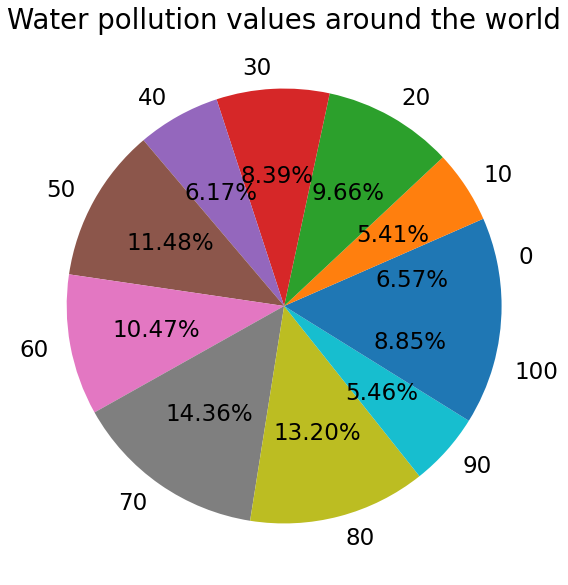

In [8]:
import matplotlib.pyplot as plt
import csv
import math
  
Cities = []
Water_pollution = []
x = [0,10,20,30,40,50,60,70,80,90,100]
histogram = [0,0,0,0,0,0,0,0,0,0,0]
count = 0

fig, ax = plt.subplots(1, figsize=(32, 10))
with open('Pollution.csv','r' ,  encoding="utf8") as csvfile:
    lines = csv.reader(csvfile, delimiter = ',')
    for row in lines:
        if count > 0:
            histogram[math.floor(float(row[6])/10)] = histogram[math.floor(float(row[6])/10)]+1
            #Cities.append(row[0])
            #Water_pollution.append(float(row[6]))
        count = count + 1
  
#plt.pie(Water_pollution,labels = Cities,autopct = '%.2f%%')
plt.pie(histogram,labels = x,autopct = '%.2f%%')
plt.title('Water pollution values around the world')
plt.show()

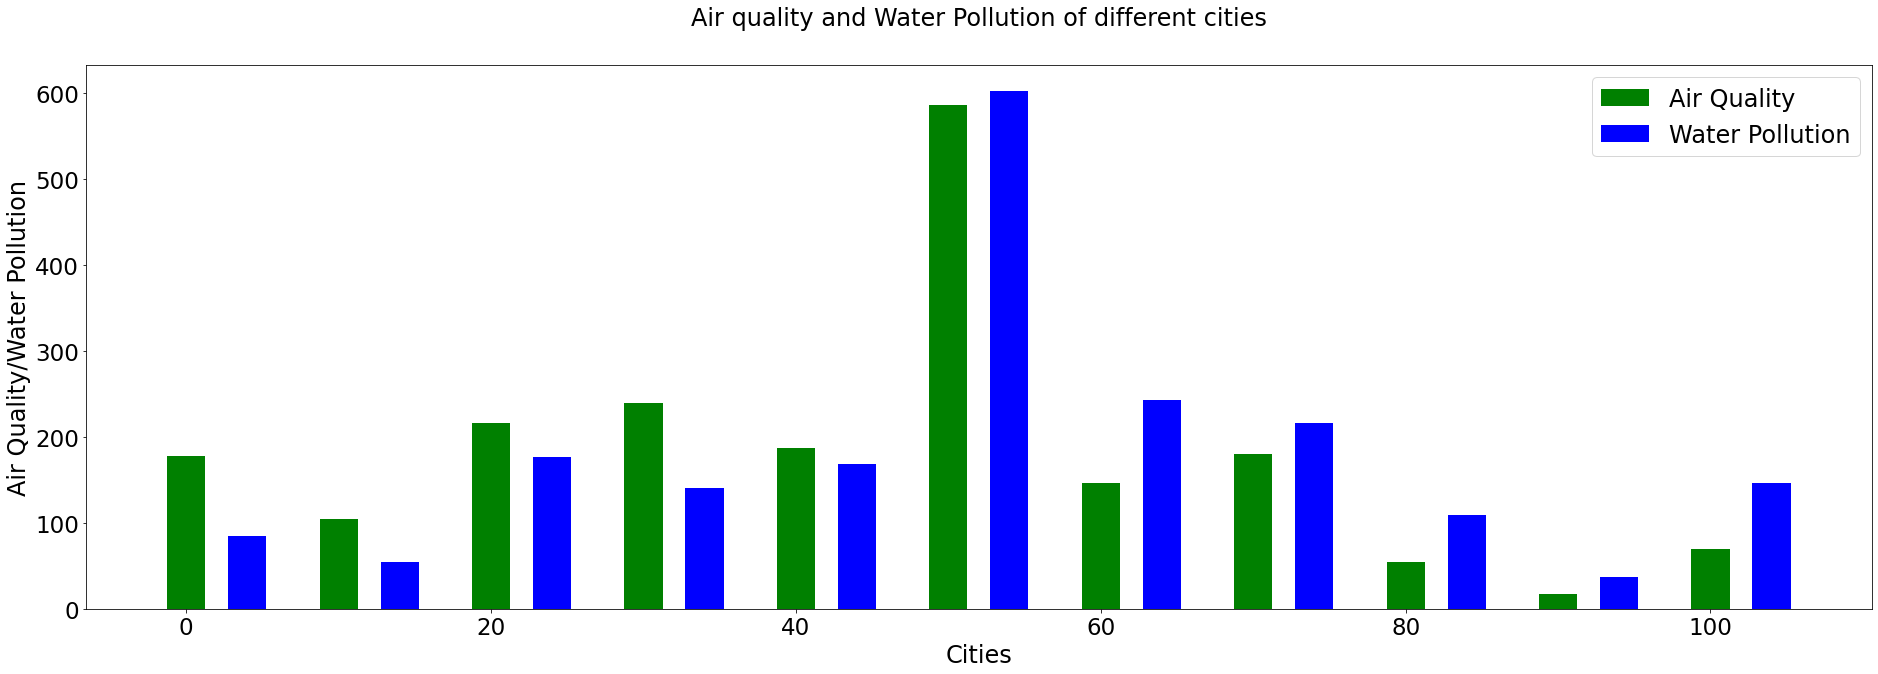

In [17]:
import matplotlib.pyplot as plt
import csv
import numpy as np
  
x = [0,10,20,30,40,50,60,70,80,90,100]
x1 = [4,14,24,34,44,54,64,74,84,94,104]
y = [0,0,0,0,0,0,0,0,0,0,0]
b = [0,0,0,0,0,0,0,0,0,0,0]
count = 0

plt.rc('font', size=23) #controls default text size
barWidth = 2.5
fig, ax = plt.subplots(1, figsize=(32, 10))

AQ=[x,y]
WQ=[x1,b]
  
with open('Pollution.csv', 'r' , encoding="utf8") as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
      
    for row in plots:
        if count > 0:
            y[math.floor(float(row[7])/10)] = y[math.floor(float(row[7])/10)]+1
            b[math.floor(float(row[9])/10)] = b[math.floor(float(row[9])/10)]+1
            #x.append(row[0])
            #y.append(float(row[6]))
        count = count + 1
        
br1 = np.arange(len(AQ))
br2 = [x + 0.25 for x in br1]
  
plt.bar( x, y, color = 'green', label = "Air Quality" , width = barWidth)
plt.bar( x1, b, color = 'blue', label = "Water Pollution" , width = barWidth)
plt.xlabel('Cities', fontsize=24)
plt.ylabel('Air Quality/Water Pollution', fontsize=24)
plt.title('Air quality and Water Pollution of different cities' ,pad=40, fontsize=24)
plt.legend( fontsize=24)

plt.show()

In [10]:
import geopandas as gpd

map_data = gpd.read_file('world_borders/WORLD_BORDERS.shp')
map_data.rename(columns = {'New_name':'UN'}, inplace = True)
map_data.shape

C:\Users\night\anaconda3\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


(246, 12)

In [11]:
map_data.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.88722 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 4.78583 36.89472, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76805, 45.81999 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.60056 41.79666..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"POLYGON ((45.15387 41.19860, 46.00194 40.22555..."


In [12]:
merged_data = pd.merge(map_data, carbon, how = 'left', on = 'NAME')
merged_data.fillna(0, inplace = True)
merged_data.head()

NotImplementedError: fillna currently only supports filling with a scalar geometry

In [13]:
print(len(merged_data))

247


C:\Users\night\anaconda3\lib\site-packages\geopandas\geodataframe.py:557: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)
C:\Users\night\anaconda3\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\night\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\night\anaconda3\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


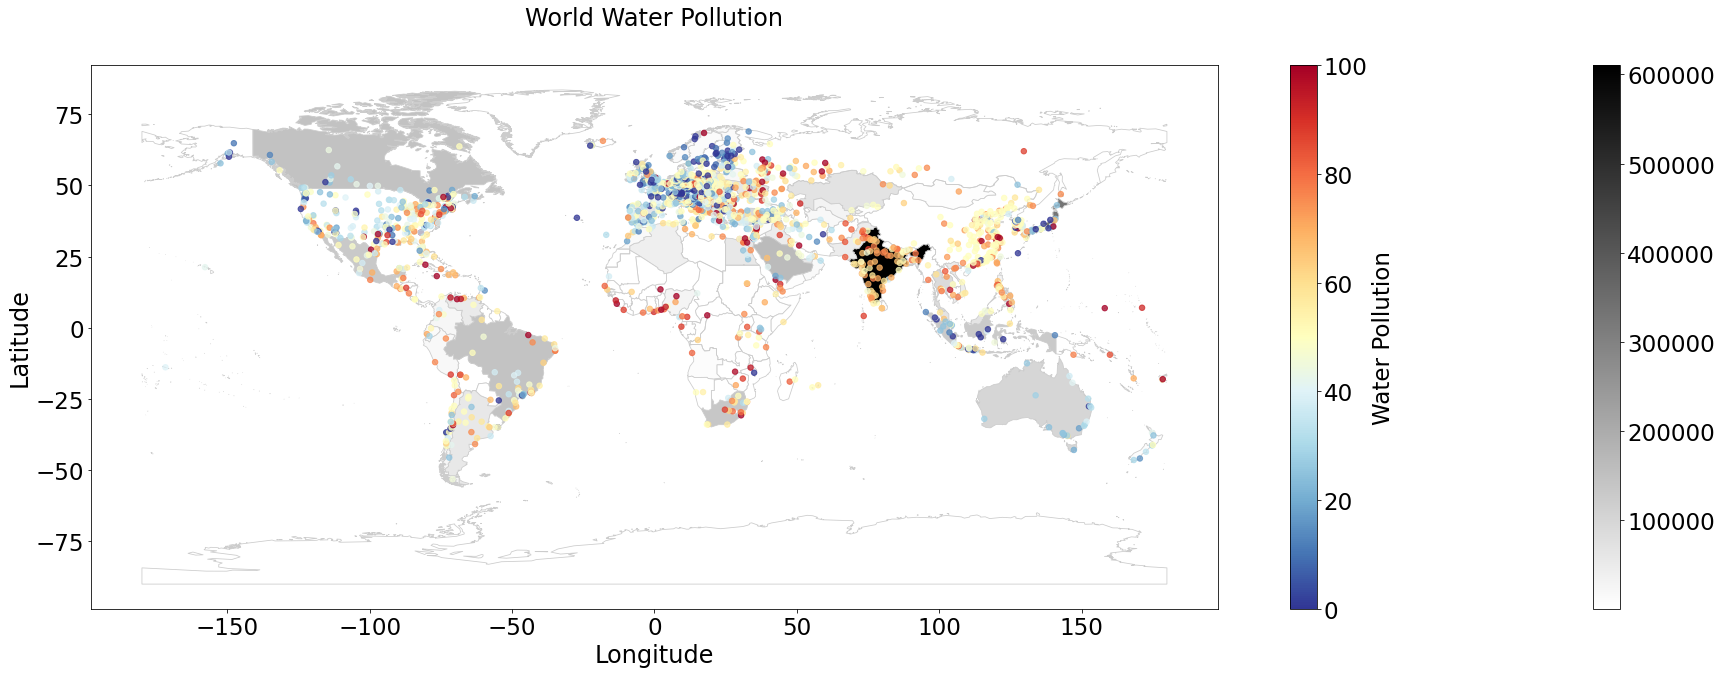

In [14]:
import matplotlib
from matplotlib import cm

fig, ax = plt.subplots(1, figsize=(32, 10))

Total = map_data[merged_data["Total"]>0]
# Visualization layer that creates a base map
merged_data.plot(column = 'Total', cmap='gray_r', label='Total Fuel', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)

my_cmap2 = cm.RdYlBu_r

norm = matplotlib.colors.Normalize(vmin=0, vmax=100)
r = cm.ScalarMappable(cmap=my_cmap2, norm=norm)
r.set_array([])
plt.colorbar(r, label='Water Pollution')

# Visualization layer that creates geospatial view of pollution data
plt.scatter(latitude, longitude, c=waterquality, cmap=my_cmap2, s=30, alpha=0.75)

plt.xlabel("Longitude", fontsize=24)
plt.ylabel("Latitude", fontsize=24)
plt.title("World Water Pollution", pad=40, fontsize=24)

plt.show()

C:\Users\night\anaconda3\lib\site-packages\geopandas\geodataframe.py:557: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)
C:\Users\night\anaconda3\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\night\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\night\anaconda3\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


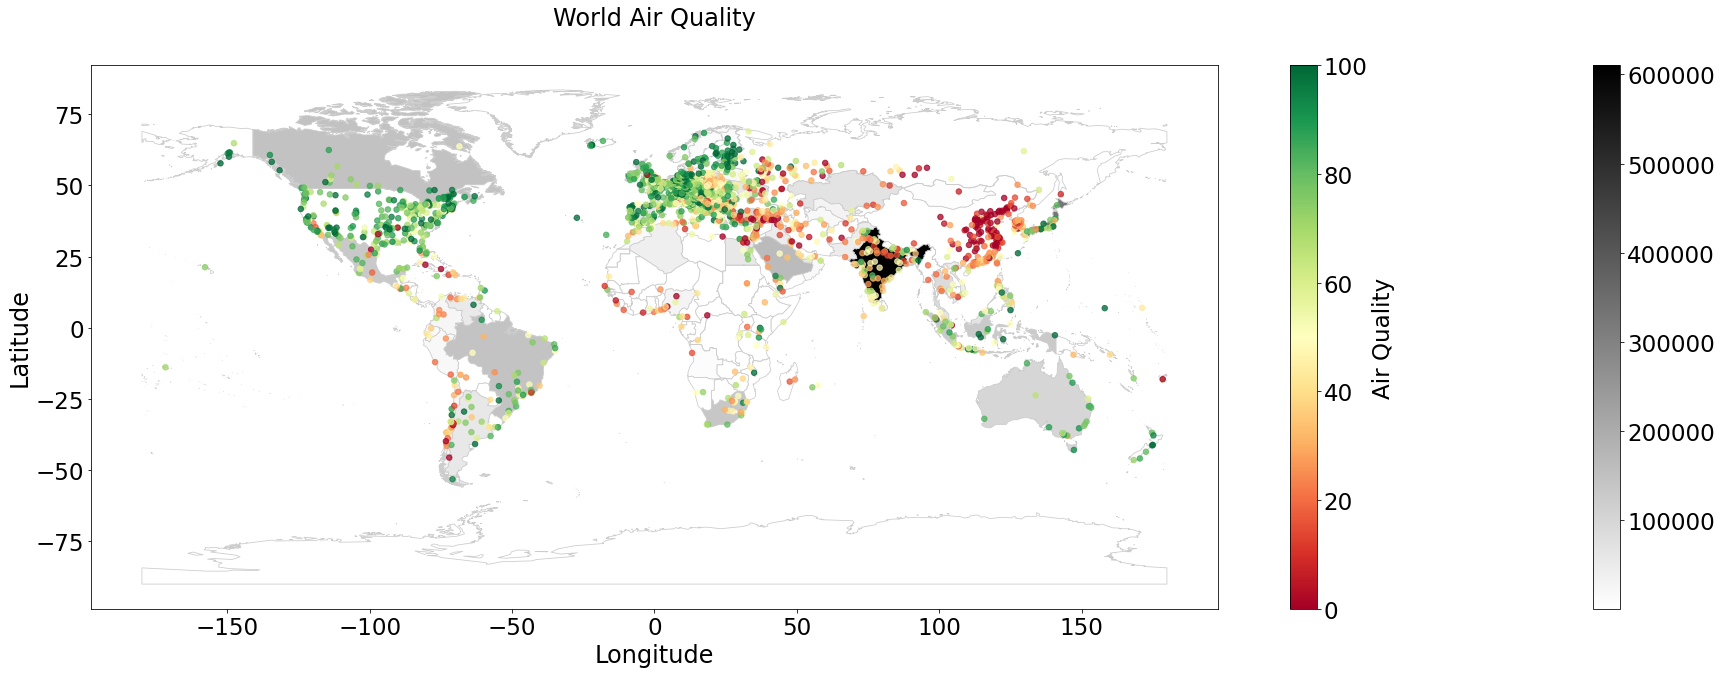

In [15]:
import matplotlib
from matplotlib import cm

fig, ax = plt.subplots(1, figsize=(32, 10))

Total = map_data[merged_data["Total"]>0]
# Visualization layer that creates a base map
merged_data.plot(column = 'Total', cmap='gray_r', label='Total Fuel', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)

my_cmap = cm.RdYlGn

norm = matplotlib.colors.Normalize(vmin=0, vmax=100)
r = cm.ScalarMappable(cmap=my_cmap, norm=norm)
r.set_array([])
plt.colorbar(r, label='Air Quality')

# Visualization layer that creates geospatial view of pollution data
plt.scatter(latitude, longitude, c=airquality, cmap=my_cmap, s=30, alpha=0.75)

plt.xlabel("Longitude", fontsize=24)
plt.ylabel("Latitude", fontsize=24)
plt.title("World Air Quality", pad=40, fontsize=24)

plt.show()

['122461', '133395', '67342', '7876', '0']


Text(0.5, 1.0, 'Carbon Fuels by Type for JAPAN')

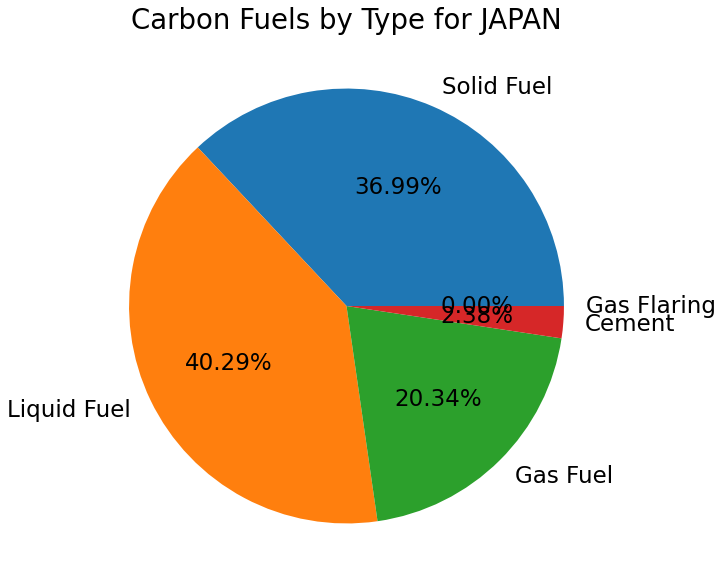

In [16]:
fig, ax = plt.subplots(1, figsize=(32, 10))

carbon_types = []
fuel_labels = ['Solid Fuel','Liquid Fuel','Gas Fuel','Cement','Gas Flaring']
target = 'JAPAN'
count = 0

with open('Carbon.csv','r', encoding="utf8") as csvfile:
    lines = csv.reader(csvfile, delimiter = ',')
    for row in lines:
        country_name = row[1]
        if(country_name==target):
            carbon_types.append(row[3])
            carbon_types.append(row[4])
            carbon_types.append(row[5])
            carbon_types.append(row[6])
            carbon_types.append(row[7])
        
print(carbon_types)

plt.pie(carbon_types,labels = fuel_labels,autopct = '%.2f%%')
plt.title('Carbon Fuels by Type for ' + target)
#plt.show()